# Analiza podatkov

Avtorica: Maria Šulek  
V analizi so uporabljeni podatki, zajeti s spletne strani [WTA Tennis](https://www.wtatennis.com/rankings/singles).

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

wta_podatki = pd.read_csv("pridobivanje_podatkov/wta_igralke.csv")

## Tabela podatkov
Najprej si oglejmo razpredelnico z vsemi zajetimi podatki. Vključuje osnovne podatke o igralkah: ID igralke, ime, priimek, državo, datum rojstva, starost, rang, točke, leto, na katerega se podatki nanašajo ter kontinent.

In [13]:
wta_podatki


,id_igralke,ime,priimek,polno_ime,drzava,datum_rojstva,starost,rang,tocke,leto,kontinent
0,80301,Martina,Hingis,Martina Hingis,SUI,1980-09-30,20,1,6044,2000,Evropa
1,40106,Lindsay,Davenport,Lindsay Davenport,USA,1976-06-08,25,2,5021,2000,Severna Amerika
2,230220,Venus,Williams,Venus Williams,USA,1980-06-17,21,3,3694,2000,Severna Amerika
3,190141,Monica,Seles,Monica Seles,USA,1973-12-02,27,4,3255,2000,Severna Amerika
4,130113,Conchita,Martínez,Conchita Martínez,ESP,1972-04-16,29,5,2752,2000,Evropa
...,...,...,...,...,...,...,...,...,...,...,...
6245,317805,Carol,Zhao,Carol Zhao,CAN,1995-06-20,30,246,286,2024,Severna Amerika
6246,330723,Tatiana,Prozorova,Tatiana Prozorova,RUS,2003-10-10,21,247,286,2024,Evropa
6247,323677,Justina,Mikulskyte,Justina Mikulskyte,LTU,1996-02-06,29,248,283,2024,Evropa
6248,318857,Haruka,Kaji,Haruka Kaji,JPN,1994-09-25,30,249,282,2024,Azija


## Povprečne vrednosti skozi leta

### Povprečno število točk po letih

Najboljše leto: 2020
Najslabše leto: 2006


Text(0, 0.5, 'Točke')

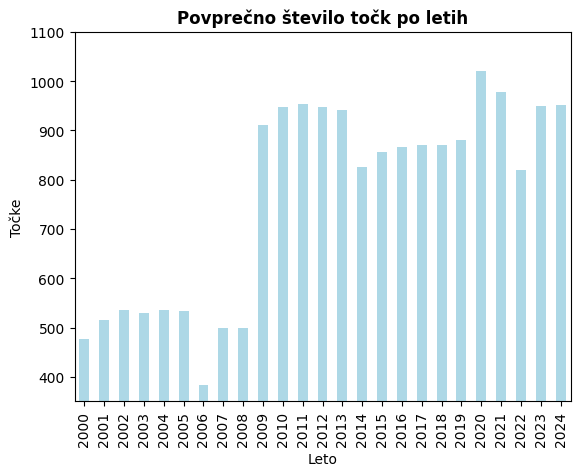

In [30]:
povprecne_tocke = wta_podatki.groupby("leto")["tocke"].mean()
najslabse_leto = povprecne_tocke.idxmin()
najboljse_leto = povprecne_tocke.idxmax()

print(f"Najboljše leto: {najboljse_leto}")
print(f"Najslabše leto: {najslabse_leto}")

povprecne_tocke.plot(kind="bar", color="lightblue")
plt.title("Povprečno število točk po letih", fontweight="bold")
plt.ylim(350, 1100)
plt.xlabel("Leto")
plt.ylabel("Točke")   

Vidi se, da se povprečno število točk s časom povečuje. Pri tem je bilo največje povprečno število točk doseženo leta 2020 in najmanjše v letu 2006.

## Povprečna starost po letih

Text(0, 0.5, 'Starost')

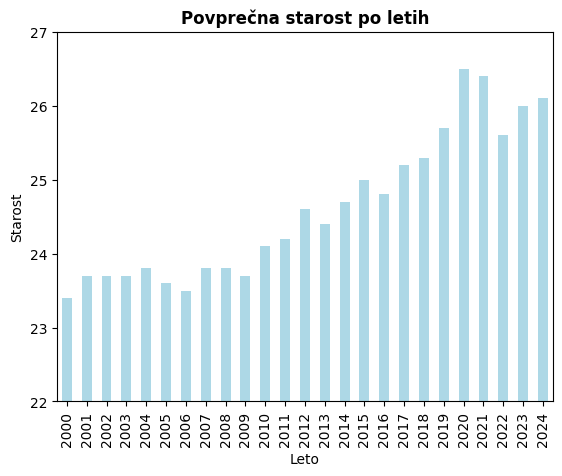

In [15]:
povprecna_starost = wta_podatki.groupby("leto")["starost"].mean().round(1)

povprecna_starost.plot(kind="bar", title="Povprečna starost po letih", color="lightblue")
plt.title("Povprečna starost po letih", fontweight="bold")
plt.ylim(22, 27)
plt.xlabel("Leto")
plt.ylabel("Starost")

Opazimo, da se povprečna starost igralk skozi čas prav tako povečuje.

# Primerjava najboljših 10 igralk in ostalih

      Najboljših 10  Najboljših 50
leto                              
2000         3138.1       1014.725
2001         3496.6       1038.525
2002         3533.2       1112.850
2003         3557.4       1088.375
2004         3460.6       1106.700
2005         3524.8       1077.825
2006         2471.0        702.325
2007         3253.7       1044.175
2008         3326.4       1002.700
2009         5539.7       1898.325
2010         5472.7       2042.900
2011         5916.5       1923.600
2012         6619.5       1706.200
2013         5998.2       1888.900
2014         5329.5       1695.950
2015         4952.7       1831.750
2016         5256.1       1722.975
2017         5141.5       1750.500
2018         5071.5       1826.450
2019         5259.8       1729.150
2020         5577.3       2128.325
2021         4961.6       2015.625
2022         4553.9       1541.100
2023         5565.6       1704.425
2024         5497.2       1802.950


Text(0, 0.5, 'Tocke')

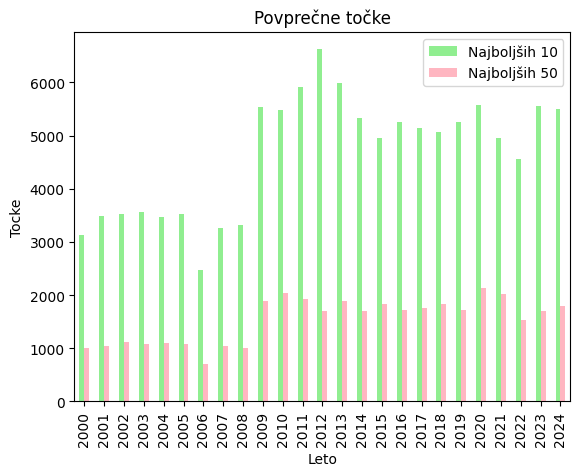

In [41]:
def vrh_lestvice(nabor, rang):
    return nabor[nabor["rang"] <= rang]

def dno_lestvice(nabor, rang1, rang2):
    return nabor[(nabor["rang"] >= rang1) & (nabor["rang"] <= rang2)]

povp_tocke_top10 = vrh_lestvice(wta_podatki, 10).groupby("leto")["tocke"].mean()
povp_tocke_ostale = dno_lestvice(wta_podatki, 11, 50).groupby("leto")["tocke"].mean()

skupna_tabela = pd.concat([povp_tocke_top10, povp_tocke_ostale],axis=1)
skupna_tabela.columns = ["Najboljših 10", "Najboljših 50"]
print(skupna_tabela)

skupna_tabela.plot(kind="bar", title="Povprečne točke", color=["lightgreen", "lightpink"])
plt.xlabel("Leto")
plt.ylabel("Tocke")

# Starost najboljših igralk skozi čas

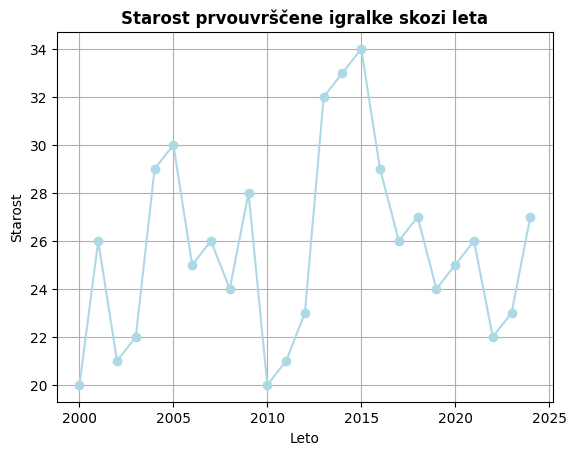

In [46]:
starost_prvih = vrh_lestvice(wta_podatki, 1)[["leto", "starost"]]

starost_prvih.plot(x="leto", y="starost", kind="line", marker="o", legend=False, color="lightblue")
plt.title("Starost prvouvrščene igralke skozi leta", fontweight="bold")
plt.xlabel("Leto")
plt.ylabel("Starost")
plt.grid(True)
plt.show()

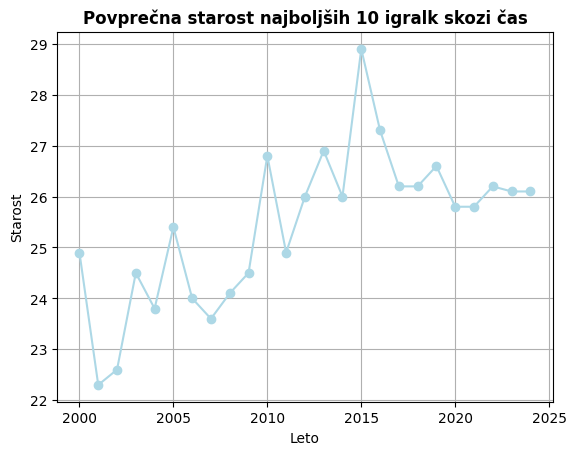

In [47]:
starosti_top10 = vrh_lestvice(wta_podatki, 10).groupby("leto")["starost"].mean()
starosti_top10.plot(x="leto", y="starost", kind="line", marker="o", legend=False, color="lightblue")

plt.title("Povprečna starost najboljših 10 igralk skozi čas", fontweight="bold")
plt.xlabel("Leto")
plt.ylabel("Starost")
plt.grid(True)
plt.show()

## Povezava med starostjo in uspešnostjo igralk na WTA lestvici

Povprečna starost igralk z vsaj 5000 točkami: 25.8
Povprečna starost igralk z vsaj 8000 točkami: 26.7


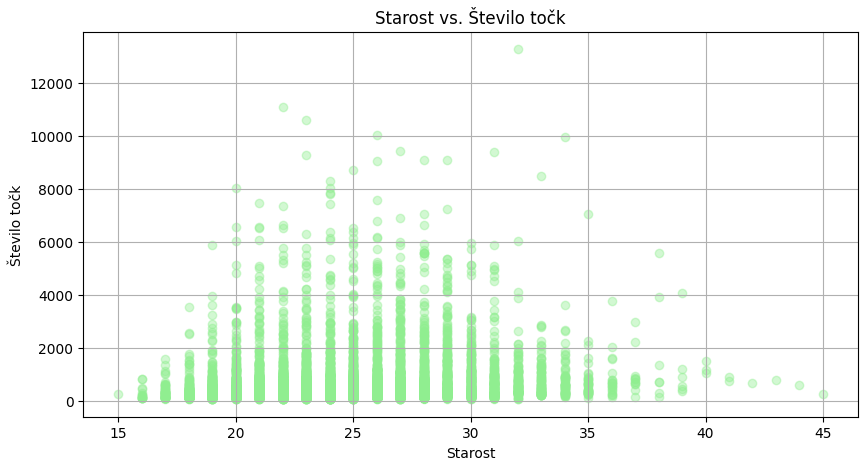

In [52]:
visoko = wta_podatki[wta_podatki["tocke"] >= 5000]["starost"]
visje = wta_podatki[wta_podatki["tocke"] >= 8000]["starost"]

print("Povprečna starost igralk z vsaj 5000 točkami:", round(visoko.mean(), 1))
print("Povprečna starost igralk z vsaj 8000 točkami:", round(visje.mean(), 1))

plt.figure(figsize=(10,5))
plt.scatter(wta_podatki["starost"], wta_podatki["tocke"], alpha=0.4, color="lightgreen")
plt.xlabel("Starost")
plt.ylabel("Število točk")
plt.title("Starost vs. Število točk")
plt.grid(True)

# Iz katerih držav prihajajo najboljše igralke?

drzava
SRB     8
ROU     8
BLR    10
AUS    11
POL    12
BEL    13
FRA    13
CZE    21
RUS    36
USA    50
Name: count, dtype: int64


Text(0, 0.5, 'Število')

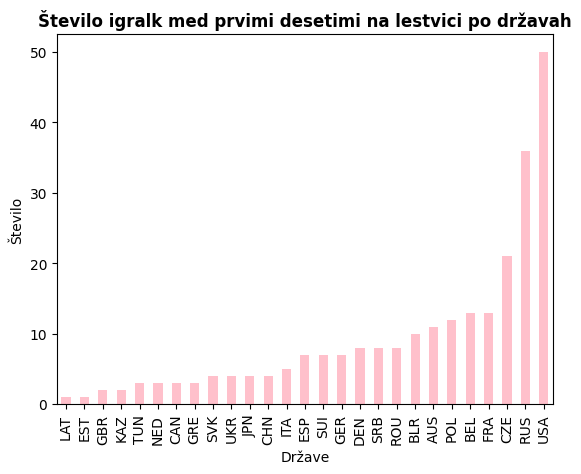

In [20]:
drzave_top10 = vrh_lestvice(wta_podatki, 10)["drzava"].value_counts().sort_values(ascending=True)
print(drzave_top10.tail(10))

drzave_top10.plot(kind="bar", color="pink")
plt.title("Število igralk med prvimi desetimi na lestvici po državah", fontweight="bold")
plt.xlabel("Države")
plt.ylabel("Število")

drzava
SUI    1
SRB    1
GER    1
POL    2
ROU    2
DEN    2
BLR    2
BEL    3
AUS    3
USA    8
Name: count, dtype: int64


Text(0, 0.5, 'Število')

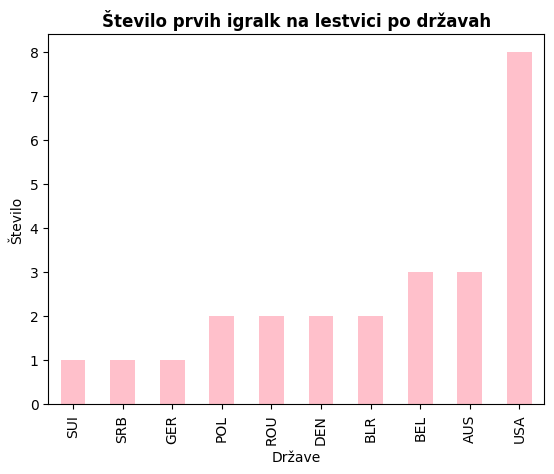

In [21]:
prve = vrh_lestvice(wta_podatki, 1)
drzave_prvih = prve["drzava"].value_counts().sort_values(ascending=True)
print(drzave_prvih)
drzave_prvih.plot(kind="bar", color="pink")
plt.title("Število prvih igralk na lestvici po državah", fontweight="bold")
plt.xlabel("Države")
plt.ylabel("Število")

kontinent
Evropa             4120
Severna Amerika     863
Azija               606
Oceanija            265
Južna Amerika       210
Ni znano            152
Afrika               34
Name: count, dtype: int64


Text(0.5, 1.0, 'Delež prvih 250 igralk iz posameznih kontinentov')

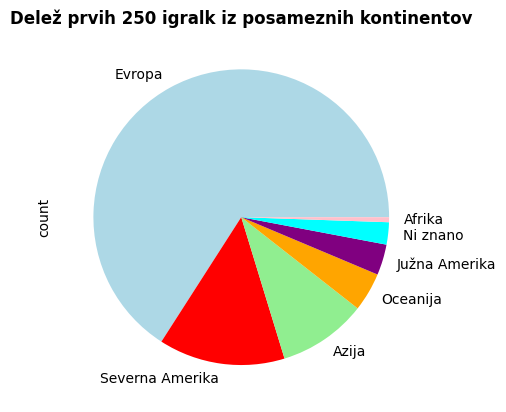

In [22]:
def delez_po_celinah(igralke):
    rez = (igralke["kontinent"]
    .fillna("Ni znano").astype(str).str.strip().replace({"": "Neznano"})
    .value_counts())
    return rez

print(delez_po_celinah(wta_podatki))

barve = ["lightblue", "red", "lightgreen", "orange", "purple", "cyan", "pink"]
delez_po_celinah(wta_podatki).plot(kind="pie", colors=barve)
plt.title("Delež prvih 250 igralk iz posameznih kontinentov", fontweight="bold")

kontinent
Evropa             173
Severna Amerika     53
Oceanija            11
Azija               10
Ni znano             3
Name: count, dtype: int64
kontinent
Evropa             14
Severna Amerika     8
Oceanija            3
Name: count, dtype: int64


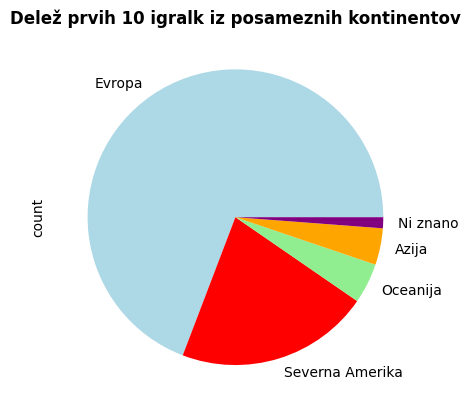

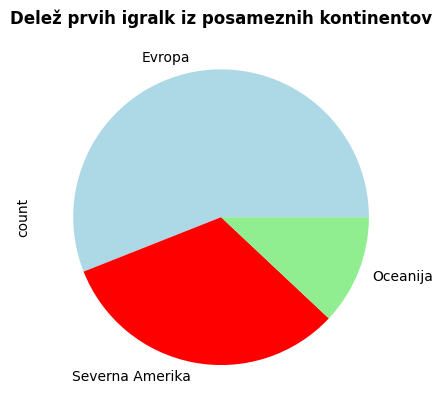

In [23]:
print(delez_po_celinah(vrh_lestvice(wta_podatki, 10)))
print(delez_po_celinah(vrh_lestvice(wta_podatki, 1)))

delez_po_celinah(vrh_lestvice(wta_podatki, 10)).plot(kind="pie", colors=barve)
plt.title("Delež prvih 10 igralk iz posameznih kontinentov", fontweight="bold")
plt.show()
delez_po_celinah(prve).plot(kind="pie", colors=barve)
plt.title("Delež prvih igralk iz posameznih kontinentov", fontweight="bold")
plt.show()

# Najpogostejša imena igralk na WTA lestvici

In [24]:
unikatne_igralke = wta_podatki.drop_duplicates(subset="id_igralke")
imena = unikatne_igralke["ime"]
pogosta = imena.value_counts().head(10)
print(pogosta)

ime
Anna         16
Anastasia    11
Olga         11
Eva          11
Maria        11
Julia        11
Elena        10
Ekaterina     8
Jessica       8
Sandra        7
Name: count, dtype: int64


In [25]:
unikatne_igralke_top10 = vrh_lestvice(wta_podatki, 10).drop_duplicates(subset="id_igralke")
imena = unikatne_igralke_top10["ime"]
pogosta_top10 = imena.value_counts().head(10)
print(pogosta_top10)

ime
Jelena      3
Karolina    2
Elena       2
Maria       2
Anna        2
Caroline    2
Coco        2
Conchita    1
Serena      1
Venus       1
Name: count, dtype: int64


In [26]:
rezultat = (
    unikatne_igralke
    .groupby("kontinent")["ime"]
    .apply(lambda x: x.value_counts().head(1))
    .reset_index()
    .rename(columns={"level_1": "ime", "ime": "število"})
)
print(rezultat)

         kontinent       ime  število
0           Afrika    Amanda        1
1            Azija     Akiko        3
2           Evropa      Anna       15
3    Južna Amerika  Catalina        2
4         Oceanija    Olivia        2
5  Severna Amerika  Jennifer        4


# Obstojnost na vrhu lestvice

Povprečno število let v Top 10: 3.2
Mediana let v Top 10: 2
Najdlje med top 10: Serena Williams, 15 let


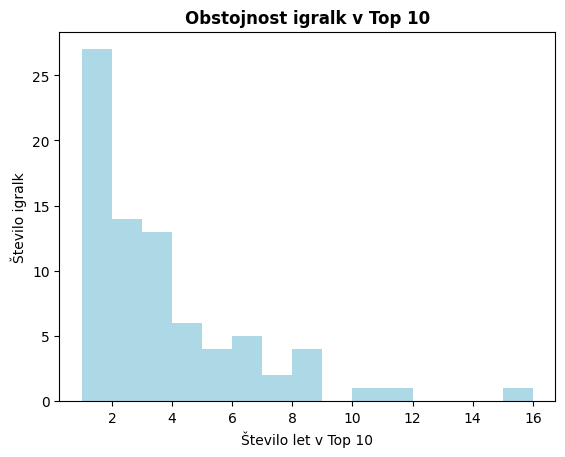

In [27]:
trajanje = vrh_lestvice(wta_podatki, 10).groupby('id_igralke')['leto'].nunique()
povprecje = trajanje.mean()
mediana = trajanje.median()

print("Povprečno število let v Top 10:", round(povprecje, 1))
print("Mediana let v Top 10:", mediana.astype(int))

najvec_let = trajanje.max()
najdlje = trajanje[trajanje == najvec_let].index

imena = (
    wta_podatki.loc[wta_podatki['id_igralke'].isin(najdlje), ['id_igralke', 'ime', 'priimek']]
    .drop_duplicates()
)

imena['polno_ime'] = imena['ime'] + ' ' + imena['priimek']

for i, vrstica in imena.iterrows():
    print(f"Najdlje med top 10: {vrstica['polno_ime']}, {najvec_let} let")


trajanje.plot(kind="hist", bins=range(1, trajanje.max() + 2), color="lightblue")
plt.title("Obstojnost igralk v Top 10", fontweight="bold")
plt.xlabel("Število let v Top 10")
plt.ylabel("Število igralk")
plt.show()

Povprečno število let na prvem mestu: 2.1
Mediana let na prvem mestu: 2
Najdlje na prvem mestu: Serena Williams, 5 let


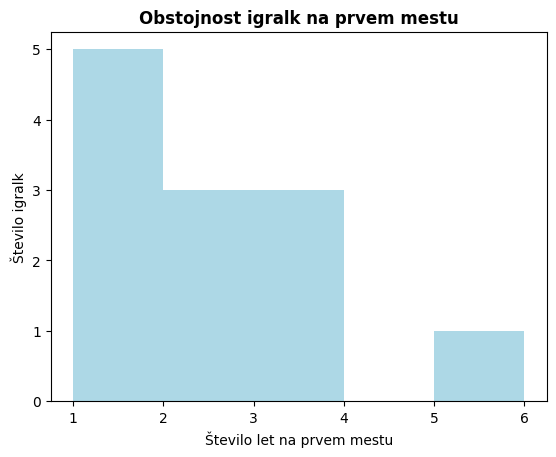

In [28]:
trajanje1 = vrh_lestvice(wta_podatki, 1).groupby('id_igralke')['leto'].nunique()
povprecje1 = trajanje1.mean()
mediana1 = trajanje1.median()

print("Povprečno število let na prvem mestu:", round(povprecje1, 1))
print("Mediana let na prvem mestu:", mediana1.astype(int))

najvec_let1 = trajanje1.max()
najdlje1 = trajanje1[trajanje1 == najvec_let1].index

imena = (
    wta_podatki.loc[wta_podatki['id_igralke'].isin(najdlje1), ['id_igralke', 'ime', 'priimek']]
    .drop_duplicates()
)

imena['polno_ime'] = imena['ime'] + ' ' + imena['priimek']

for i, vrstica in imena.iterrows():
    print(f"Najdlje na prvem mestu: {vrstica['polno_ime']}, {najvec_let1} let")


trajanje1.plot(kind="hist", bins=range(1, trajanje1.max() + 2), color="lightblue")
plt.title("Obstojnost igralk na prvem mestu", fontweight="bold")
plt.xlabel("Število let na prvem mestu")
plt.ylabel("Število igralk")
plt.show()

## Primerjava generacij

In [29]:
nova_generacija = wta_podatki[wta_podatki["leto"] >=2015]
stara_generacia = wta_podatki[wta_podatki["leto"] < 2015]

trajanje_nova = vrh_lestvice(nova_generacija, 10).groupby('id_igralke')['leto'].nunique()
trajanje_stara = vrh_lestvice(stara_generacia, 10).groupby('id_igralke')['leto'].nunique()

print(f"Povprečen obstoj igralke med top 10 igralk od 2000-2014: {trajanje_stara.mean().round(1)}")
print(f"Povprečen obstoj igralke med top 10 igralk od 2015-2024: {trajanje_nova.mean().round(1)}")

Povprečen obstoj igralke med top 10 igralk od 2000-2014: 3.4
Povprečen obstoj igralke med top 10 igralk od 2015-2024: 2.3


Vidimo, da je bila v obdobju 2000–2014 povprečna dolžina obstanka igralk med prvimi desetimi približno 3,4 leta, medtem ko se je v obdobju 2015–2024 zmanjšala na 2,3 leta. Pri tem razultatu moramo upoštevati, da je novejša generacija še vedno aktivna, zato veliko igralk še ni imelo priložnosti biti med top 10 tako dolgo kot starejša generacija, kjer so igralke že zaključile svojo kariero.

# Zaključek

Glavno vprašanje, ki smo si ga zastavili, je bilo, ali se povprečna starost igralk na WTA lestvici skozi čas povečuje. Analiza je potrdila, da se povprečna starost igralk med najboljšimi 250 in tudi med prvimi desetimi skozi leta zvišuje. 

Drugo pomembno vprašanje je bilo, iz katerih delov sveta prihajajo najboljše igralke. Naša analiza pokaže, da največ najboljših igralk prihaja iz Evrope. Če pa primerjamo posamezne države, so ZDA vodilne na svetu.

Videli smo tudi, da se je povprečen obstoj igralk v top 10 skrajšal – med letoma 2000 in 2014 je bil ta 3,4 leta, med letoma 2015 in 2024 pa le 2,3 leta.

Na koncu lahko rečemo, da je ženski tenis v zadnjih dvajsetih letih postal bolj raznolik in tekmovalen. V ospredju so igralke iz Evrope, konkurenca pa je vsako leto večja.